# Práctica 3
## Problema de regresión
<h4>José María Ramírez González<h4>
<h5>Grado en Ingeniería Informática curso 2021-2022<h5>

---

## Introducción

En la siguiente línea de código, podemos ver las librerías que vamos a usar para el desarrollo de la práctica:

In [1]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import seaborn as sns
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
plt.rc('text', usetex=True)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-11).
dvipng is already the newest version (1.15-1).
texlive-fonts-extra is already the newest version (2017.20180305-2).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


*NumPy* lo usaremos para la modificación de los datos.

*Warnings* lo usaremos para suprimir los avisos que nos puedan salir por pantalla, ya que cada vez que no converge un modelo de scikit-learn nos salta un aviso. Esto puede complicar la lectura de las baterías de prueba.

*Pandas* lo usaremos para todo lo relacionado con el manejo de los datos como Dataframes.

*Matplotlib* y *Seaborn* nos ayudarán a mostrar gráficos para visualizar información relevante durante el desarrollo de la práctica.

*Scikit-learn* implementa funciones que nos ahorrarán el desarrollo de gran parte del código.

Instalaremos LaTex en la MV para poder usarlo con *matplotlib* en los títulos.

## Análisis de los datos y definición del problema

Antes de comenzar con este apartado, vamos a tomar los datos en un DataFrame y echarles un vistazo para tener una pequeña idea de con qué vamos a trabajar.

In [2]:
warnings.filterwarnings('ignore')

carpetaDatos = "drive/MyDrive/datos/"

data = pd.read_csv(carpetaDatos+"YearPredictionMSD.txt", header=None) # Usamos header=None para que no nos tome la primera fila como los nombres de las columnas

data.describe(include='all') # Usamos include=all para que nos incluya también las columnas que no sean numéricas, pese a que en nuestro caso, no tenemos


0              1              2              3   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean     1998.397082      43.387126       1.289554       8.658347   
std        10.931046       6.067558      51.580351      35.268585   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954690     -26.059520     -11.462710   
50%      2002.000000      44.258500       8.417850      10.476320   
75%      2006.000000      47.833890      36.124010      29.764820   
max      2011.000000      61.970140     384.065730     322.851430   

                  4              5              6              7   \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean        1.164124      -6.553601      -9.521975      -2.391089   
std        16.322790      22.860785      12.857751      14.571873   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487500     -20.666450     -18.440990     -10.780600   
50%        -0.652840      -6.007770     -11.188390      -2.046670   
75%         8.787540       7.741870      -2.388960       6.508580   
max       335.771820     262.068870     166.236890     172.402680   

                  8              9   ...             81             82  \
count  515345.000000  515345.000000  ...  515345.000000  515345.000000   
mean       -1.793236       3.727876  ...      15.755406     -73.461500   
std         7.963827      10.582861  ...      32.099635     175.618889   
min       -72.503850    -126.479040  ...    -437.722030   -4402.376440   
25%        -6.468420      -2.293660  ...      -1.812650    -139.555160   
50%        -1.736450       3.822310  ...       9.171850     -53.090060   
75%         2.913450       9.961820  ...      26.274480      13.478730   
max       126.741270     146.297950  ...     840.973380    4469.454870   

                  83             84             85             86  \
count  515345.000000  515345.000000  515345.000000  515345.000000   
mean       41.542422      37.934119       0.315751      17.669213   
std       122.228799      95.050631      16.161764     114.427905   
min     -1810.689190   -3098.350310    -341.789120   -3168.924570   
25%       -20.986900      -4.669540      -6.781590     -31.580610   
50%        28.791060      33.623630       0.820840      15.598470   
75%        89.661770      77.785800       8.470990      67.794960   
max      3210.701700    1734.079690     260.544900    3662.065650   

                  87             88             89             90  
count  515345.000000  515345.000000  515345.000000  515345.000000  
mean      -26.315336       4.458641      20.035136       1.329105  
std       173.977336      13.346557     185.558247      22.088576  
min     -4319.992320    -236.039260   -7458.378150    -381.424430  
25%      -101.530300      -2.566090     -59.509270      -8.820210  
50%       -21.204120       3.117640       7.759730       0.053050  
75%        52.389330       9.967740      86.351610       9.679520  
max      2833.608950     463.419500    7393.398440     677.899630  

[8 rows x 91 columns]

Como vemos, contamos en el dataframe con gran cantidad de datos.

Vamos a ir explicando un poco lo que indica cada fila de la tabla en una lista:

* *Count* indica la cantidad de datos leídos para cada columna (515345).
* *Mean* indica la media de los valores leídos.
* *std* nos indica la desviación media.
* *min* muestra el valor mínimo observado.
* Las siguientes tres filas se tratan de los percentiles, el percentil 25, 50 y 75.
* *max* muestra el valor máximo de los datos.

Como se nos indica, la columna a predecir sería la primera, siendo esta la denominada *y*.
El resto sería *X*.

Tenemos que encontrar una función $f : X → y$ que en función de unos datos de entrada $x \in X$ nos devuelva el valor de $y$ correspondiente.

## Preprocesado de los datos

En este apartado vamos a separar los datos en *X* e *y*. También vamos a aplicar varias transformaciones que nos faciliten el manejo de los mismos.

Antes de comenzar con las transformaciones, vamos a separar los datos en train y test usando *train_test_split* de *scikit-learn*.

In [17]:
y = data[0]
X = data.drop(0, axis=1)

train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3)
train_X.describe()

1              2              3              4   \
count  360741.000000  360741.000000  360741.000000  360741.000000   
mean       43.390561       1.338015       8.666314       1.192509   
std         6.064760      51.540247      35.274944      16.316391   
min         1.749000    -337.092500    -301.005060    -149.962040   
25%        39.971760     -26.057230     -11.447470      -8.459120   
50%        44.265910       8.490460      10.495160      -0.627130   
75%        47.835500      36.132880      29.769300       8.788810   
max        61.970140     384.065730     322.851430     335.771820   

                  5              6              7              8   \
count  360741.000000  360741.000000  360741.000000  360741.000000   
mean       -6.565197      -9.520308      -2.387854      -1.788418   
std        22.869052      12.846572      14.551575       7.969166   
min      -181.953370     -81.794290    -188.214000     -72.503850   
25%       -20.680940     -18.436680     -10.781740      -6.455280   
50%        -6.009620     -11.182540      -2.046980      -1.734890   
75%         7.738310      -2.399430       6.502360       2.919190   
max       223.496060     119.815590     172.402680     126.741270   

                  9              10  ...             81             82  \
count  360741.000000  360741.000000  ...  360741.000000  360741.000000   
mean        3.729939       1.887230  ...      15.703612     -73.345326   
std        10.585838       6.530287  ...      31.945515     175.684406   
min      -119.487530     -40.454970  ...    -288.545230   -4402.376440   
25%        -2.297460      -2.435570  ...      -1.821130    -139.525930   
50%         3.816240       1.792790  ...       9.155590     -53.027360   
75%         9.972080       6.154840  ...      26.238530      13.680620   
max       146.297950      60.345350  ...     800.688440    3255.320740   

                  83             84             85             86  \
count  360741.000000  360741.000000  360741.000000  360741.000000   
mean       41.549198      37.834709       0.309167      17.738513   
std       122.296193      94.664174      16.167225     114.230380   
min     -1810.689190   -1848.702260    -341.789120   -2375.909660   
25%       -20.972320      -4.818470      -6.782080     -31.448850   
50%        28.777780      33.593990       0.820500      15.595740   
75%        89.562830      77.742190       8.474220      67.752580   
max      3210.701700    1734.079690     260.544900    3662.065650   

                  87             88             89             90  
count  360741.000000  360741.000000  360741.000000  360741.000000  
mean      -26.387242       4.445726      19.861098       1.315705  
std       173.580788      13.273466     185.315698      22.077262  
min     -3819.933620    -236.039260   -5000.654060    -318.223330  
25%      -101.462400      -2.554380     -59.451020      -8.822500  
50%       -21.239340       3.117840       7.642190       0.019880  
75%        52.202550       9.934920      86.110230       9.656190  
max      2833.608950     275.353660    7240.653730     677.899630  

[8 rows x 90 columns]

Si nos fijamos en la tabla, podemos observar que tenemos máximos y mínimos muy alejados de los percentiles 75 y 25 respectivamente. Esto puede deberse a la presencia de *outliers*.

Vamos a eliminar estos *outliers* usando el [*IQR*](https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/). Vamos a usar los percentiles 15 y 85 para evitar quedarnos con pocos datos en el conjunto de entrenamiento.

In [18]:
q1, q3 = train_X.quantile(0.15), train_X.quantile(0.85)
iqr = q3 - q1
lower_limit, upper_limit = q1 - iqr*1.5, q3 + iqr*1.5 # Vamos a mantener el lower y upper limits para cuando tengamos el modelo listo, usarlo en los datos de test

train_X['y'] = train_y  # Juntamos a la X la y para eliminar los outliers también de la y
train_X_reduced = train_X[~((X < lower_limit) |(X > upper_limit)).any(axis=1)]

train_y_reduced = train_X_reduced['y']  # Volvemos a separar
train_X_reduced = train_X_reduced.drop('y', axis=1)

train_X_reduced.describe()

1              2              3              4   \
count  263773.000000  263773.000000  263773.000000  263773.000000   
mean       44.917045       8.060722      11.865565      -1.064544   
std         5.066566      44.082307      28.780745      12.005867   
min        19.103670    -194.665240    -122.712010     -54.354060   
25%        41.843050     -17.192330      -5.757580      -8.686530   
50%        45.553860      13.090340      13.042310      -1.794810   
75%        48.697660      38.245970      30.035390       5.894480   
max        61.113900     191.998380     138.200400      57.220780   

                  5             6              7              8   \
count  263773.000000  263773.00000  263773.000000  263773.000000   
mean       -8.672810     -11.06819      -2.163865      -2.308629   
std        20.811913      10.77162      12.691024       6.737676   
min       -95.095450     -53.22247     -56.877390     -31.384750   
25%       -21.838670     -18.80753      -9.947280      -6.505260   
50%        -7.676920     -12.18380      -1.989370      -2.155020   
75%         5.429640      -4.47743       5.921390       2.066470   
max        80.950930      40.40756      52.220130      27.611490   

                  9              10  ...             81             82  \
count  263773.000000  263773.000000  ...  263773.000000  263773.000000   
mean        4.444485       1.616125  ...      10.269808     -57.990693   
std         9.179637       5.991997  ...      20.933743     115.841365   
min       -34.713650     -24.391690  ...     -78.530470    -593.461780   
25%        -1.361030      -2.446600  ...      -2.428880    -116.211350   
50%         4.303660       1.574340  ...       6.824590     -47.075130   
75%        10.129590       5.698140  ...      19.938250       9.567380   
max        42.402940      27.637720  ...     110.935530     443.809680   

                  83             84             85             86  \
count  263773.000000  263773.000000  263773.000000  263773.000000   
mean       26.956060      34.842500       1.492805      17.824158   
std        81.365047      61.734504      11.598181      73.155703   
min      -328.798840    -238.772300     -51.174060    -312.861660   
25%       -20.826640      -0.236200      -4.858010     -24.181100   
50%        22.112980      32.067120       1.307080      15.086110   
75%        70.524320      68.131980       7.973620      58.729950   
max       411.493240     317.557140      52.311940     352.396700   

                  87             88             89             90  
count  263773.000000  263773.000000  263773.000000  263773.000000  
mean      -24.595228       2.939646       8.071224      -0.455145  
std       117.833706       9.173042     111.603520      14.957984  
min      -543.350490     -37.449770    -477.715720     -63.068540  
25%       -89.556450      -2.412520     -54.001980      -8.320950  
50%       -21.008670       2.462720       2.916010      -0.582530  
75%        41.521620       7.862090      65.903870       7.163420  
max       489.164890      46.424620     518.996190      65.213510  

[8 rows x 90 columns]

Como vemos, se ha reducido aproximadamente en un tercio el número de filas de train.
Ahora que tenemos una muestra un tanto más reducida, vamos a explorar posibles relaciones entre las distintas *features* y nuestra *y*.
Para ello, vamos a dibujar varias gráficas con matplotlib.

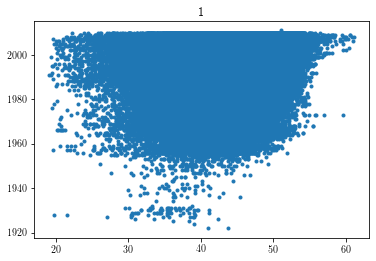

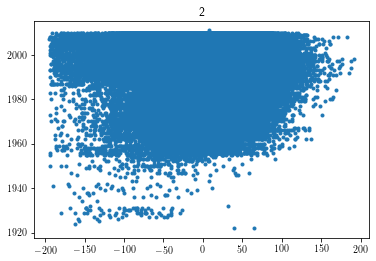

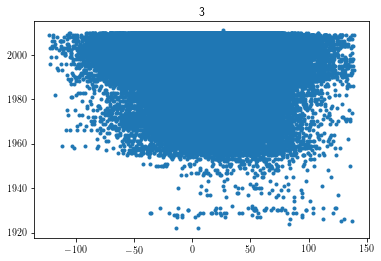

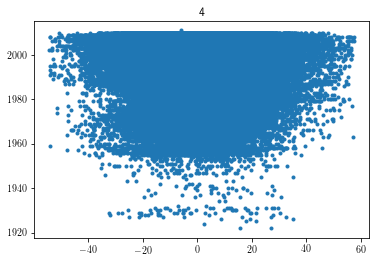

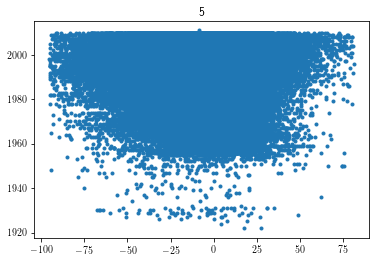

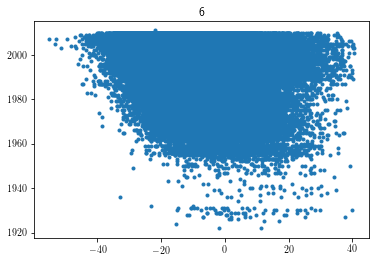

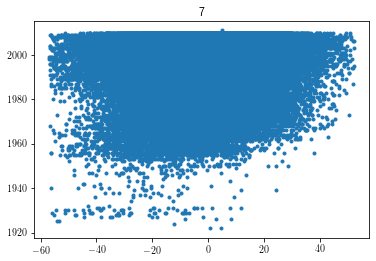

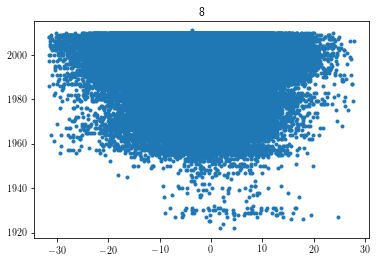

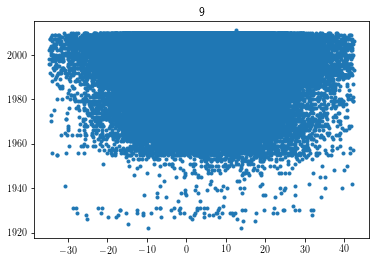

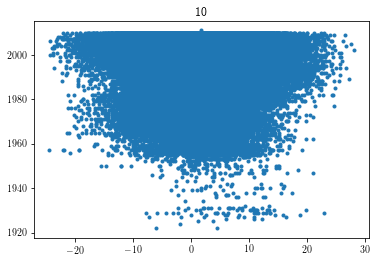

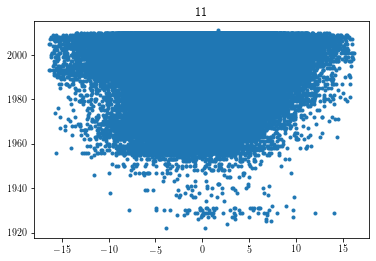

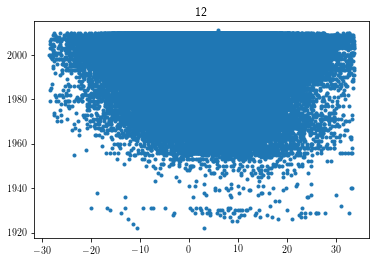

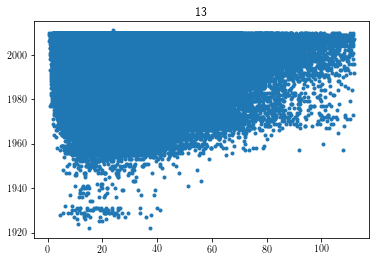

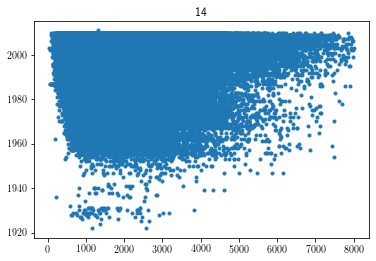

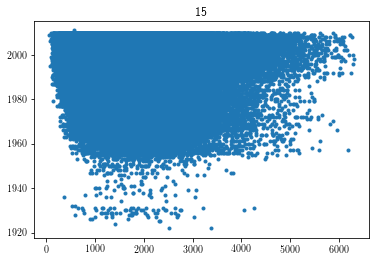

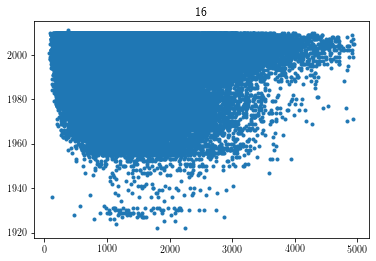

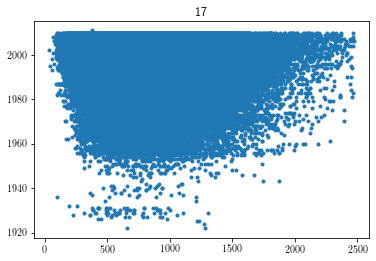

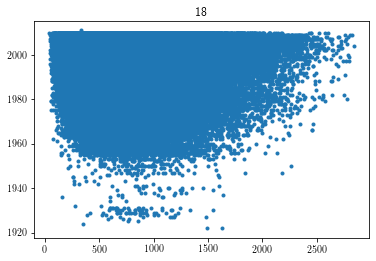

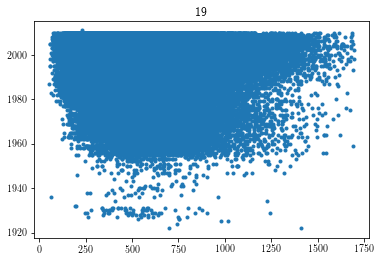

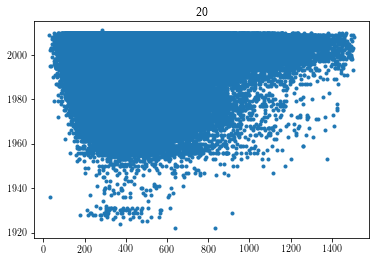

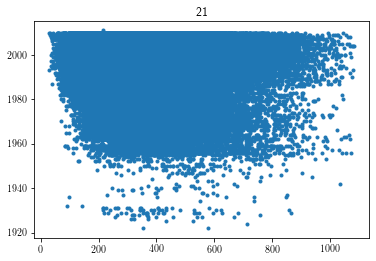

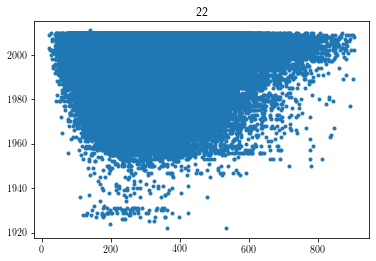

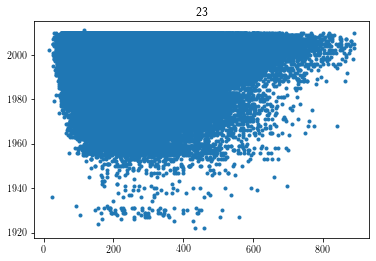

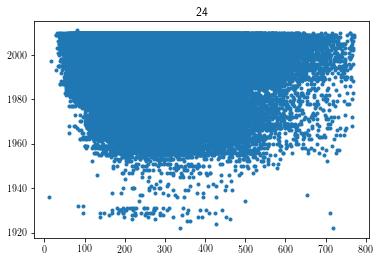

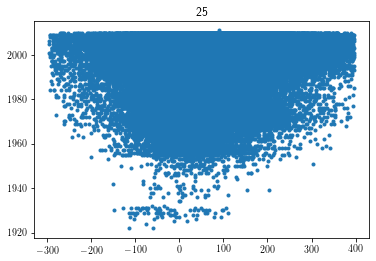

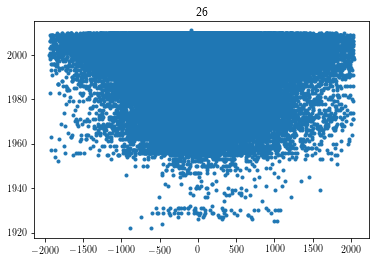

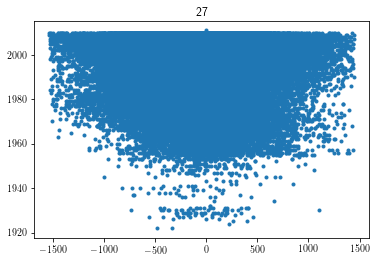

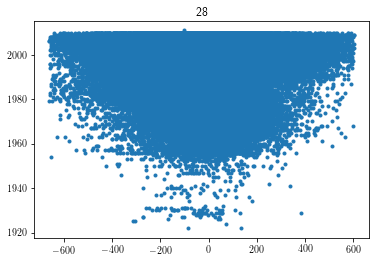

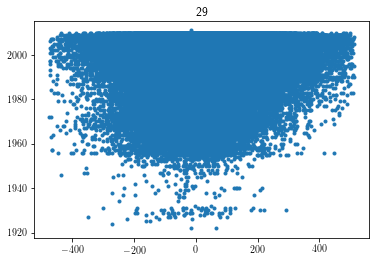

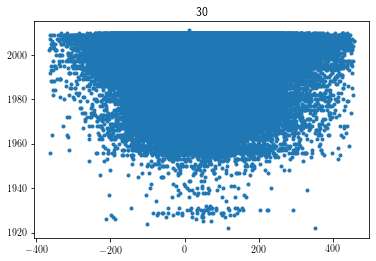

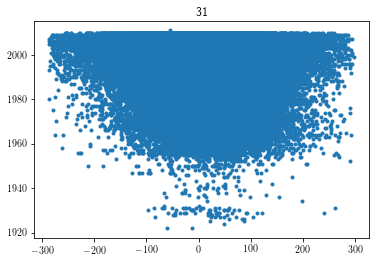

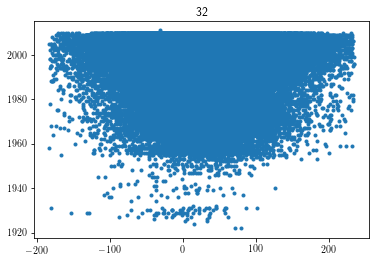

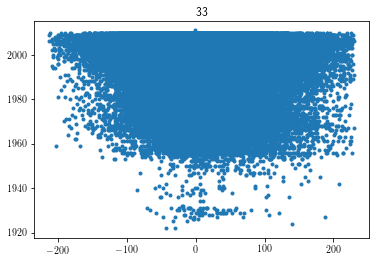

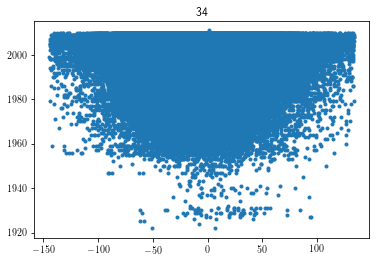

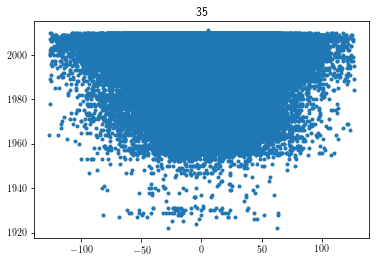

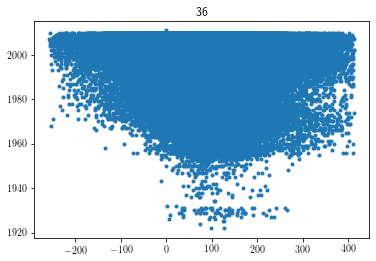

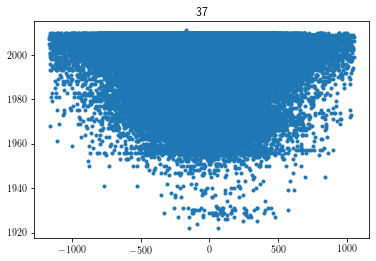

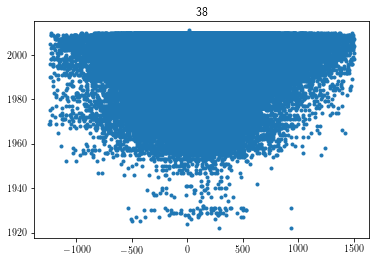

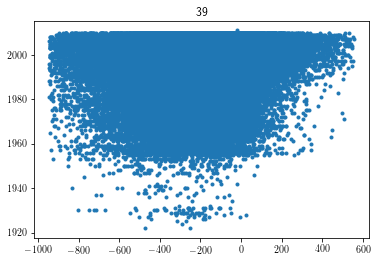

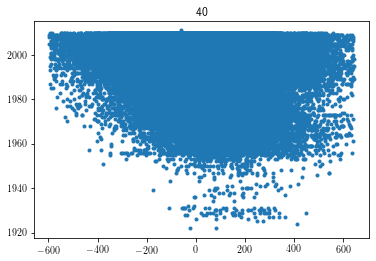

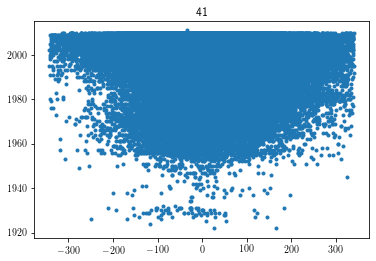

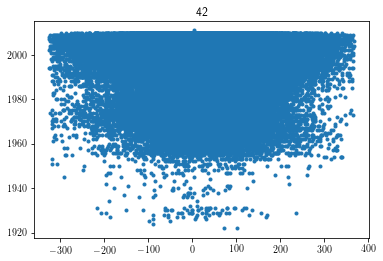

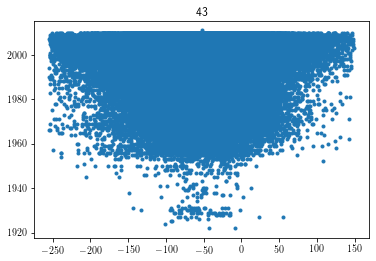

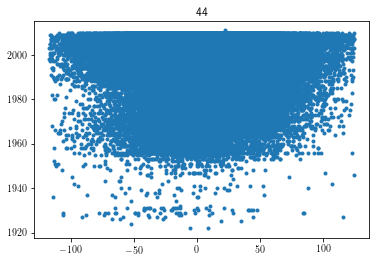

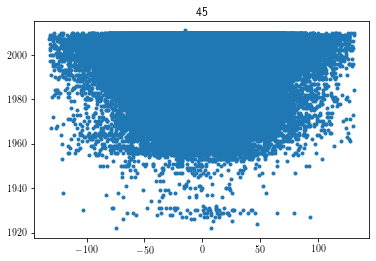

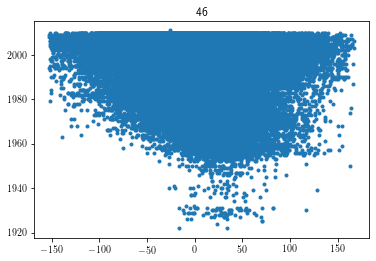

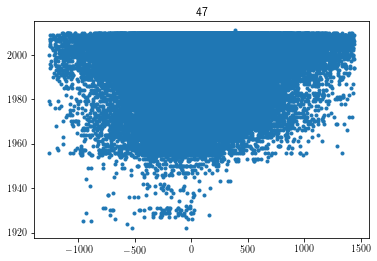

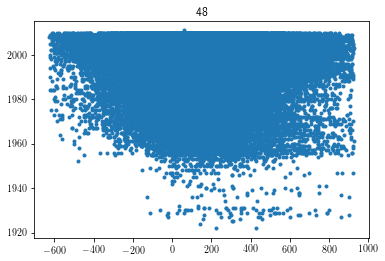

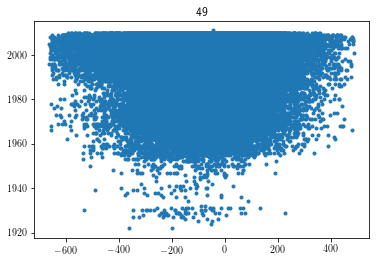

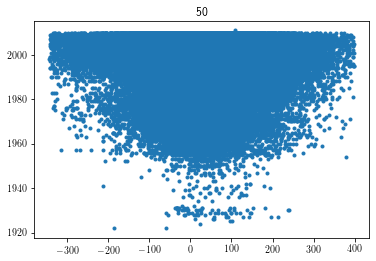

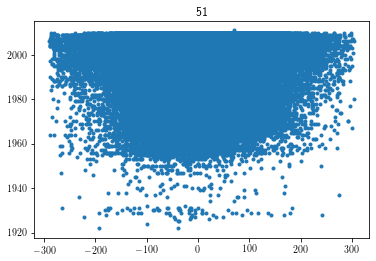

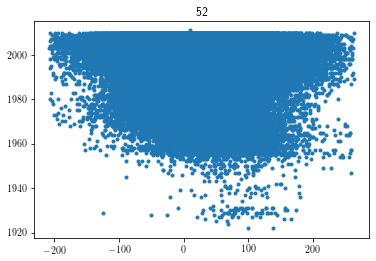

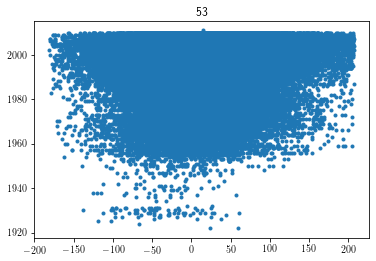

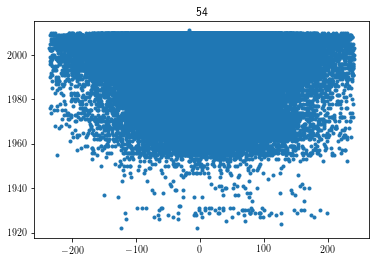

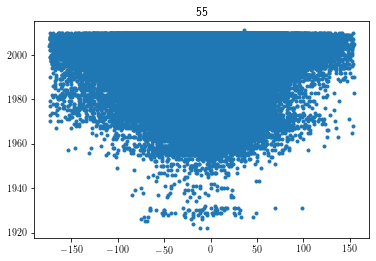

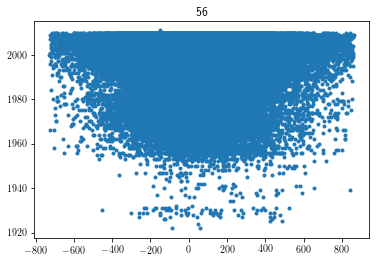

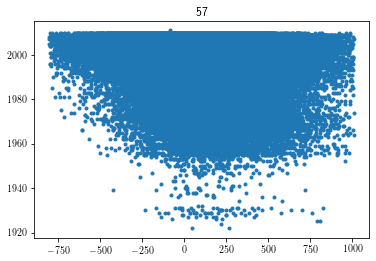

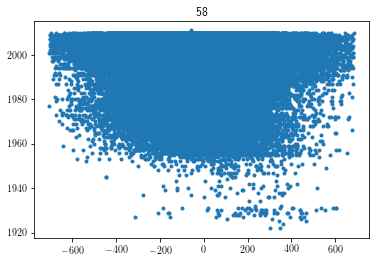

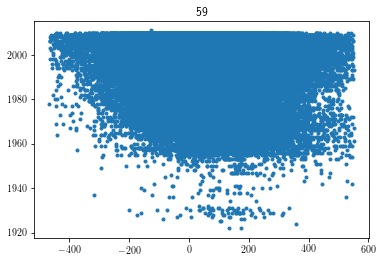

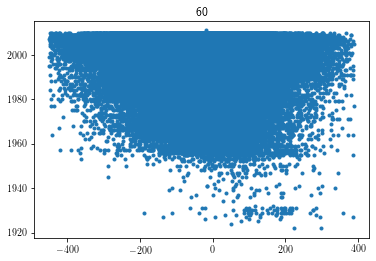

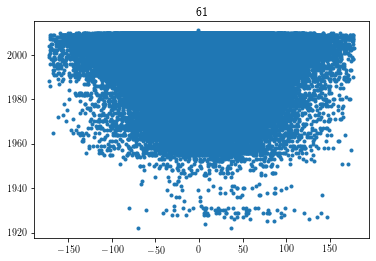

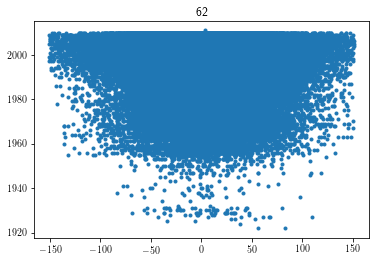

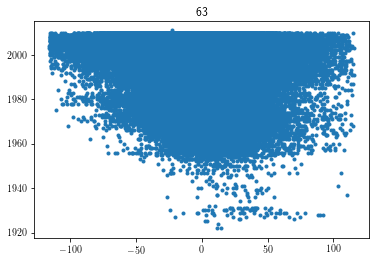

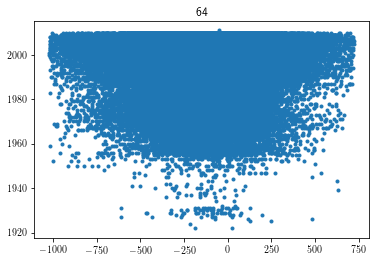

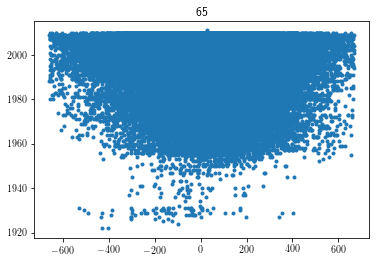

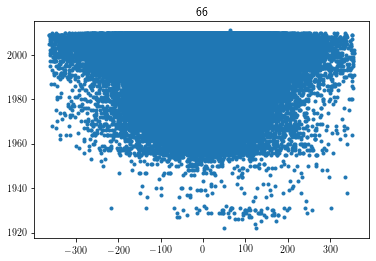

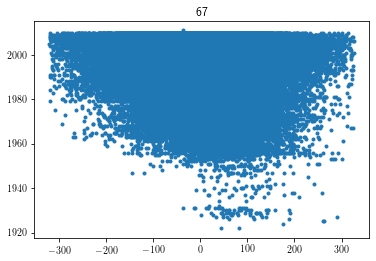

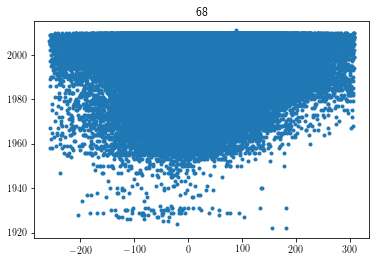

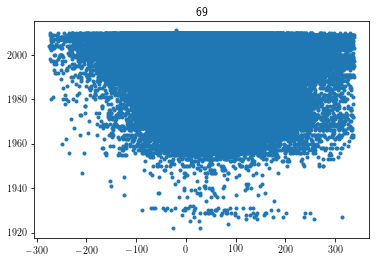

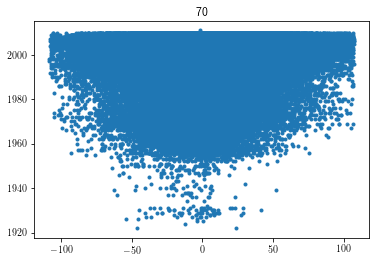

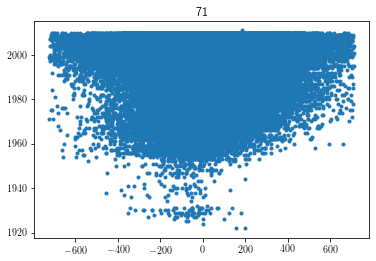

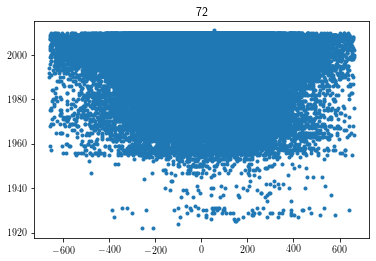

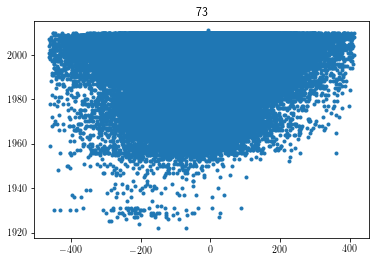

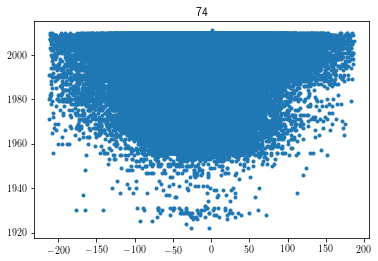

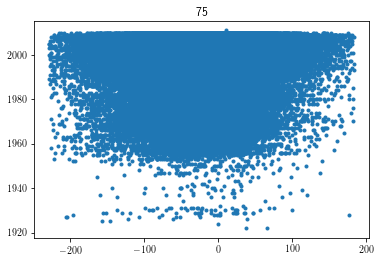

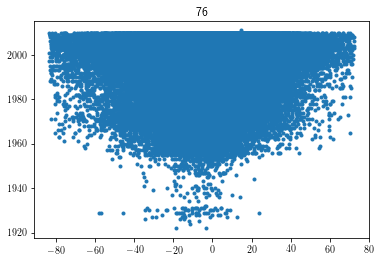

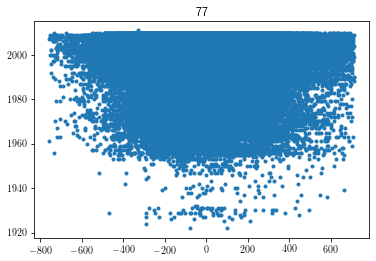

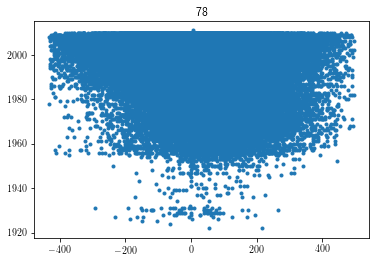

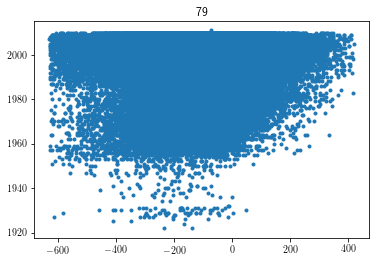

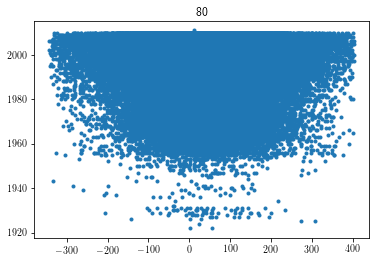

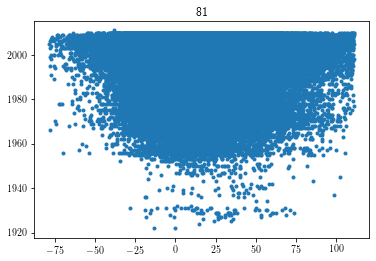

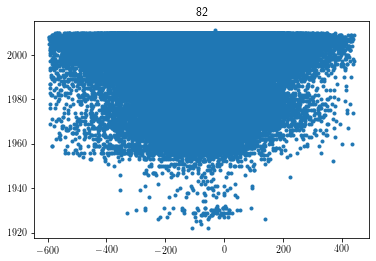

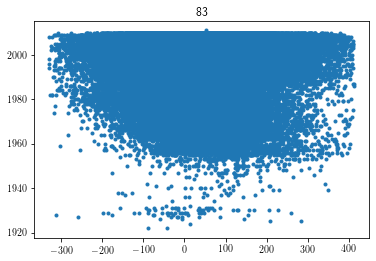

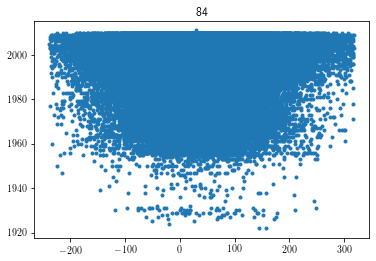

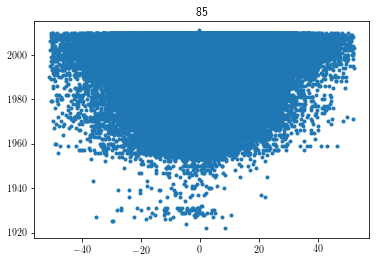

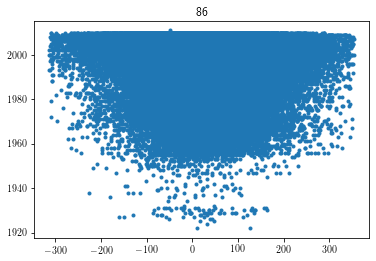

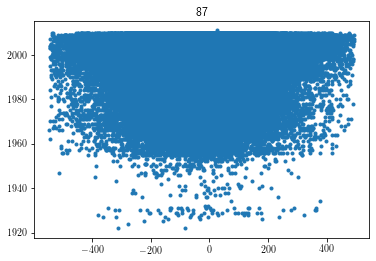

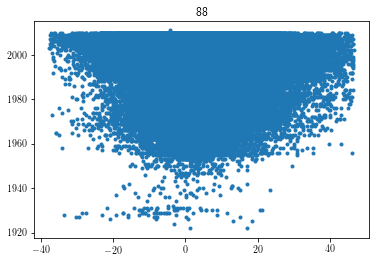

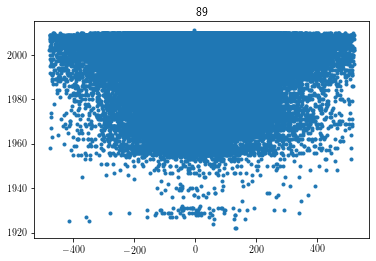

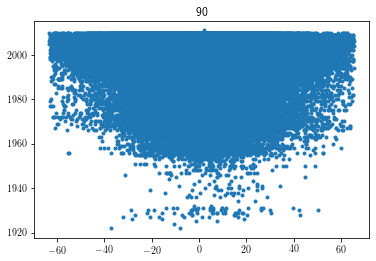

In [5]:
for column in train_X_reduced.columns:
  plt.scatter(train_X_reduced[column], train_y_reduced, marker=".")
  plt.title(column)
  plt.show()

Como vemos en todas las gráficas, no parece que presenten relaciones de proporcionalidad.

Vamos a crear una distribución similar a la Gaussiana usando *PowerTransformer*.
Usaremos el método *Yeo-Johnson*, ya que en base a [estras gráficas](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#powertransformer) es el que más nos interesa.

Cabe destacar que esto nos dará un conjunto de datos con media 0 y varianza 1.

In [19]:
scaler = preprocessing.PowerTransformer(method='yeo-johnson')
scaler.fit(train_X_reduced) # Como siempre, nos guardamos el scaler para usarlo más adelante con los datos de test
train_X_scaled = pd.DataFrame(scaler.transform(train_X_reduced))
train_X_scaled.describe()

0             1             2             3             4   \
count  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05   
mean   3.299430e-16 -5.928705e-17  1.778433e-17  2.479275e-17  3.532424e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.922185e+00 -3.647590e+00 -4.274050e+00 -5.033162e+00 -3.894208e+00   
25%   -7.205233e-01 -6.657127e-01 -6.426337e-01 -6.184954e-01 -6.425768e-01   
50%    1.158071e-02 -2.488122e-03  8.283741e-03  8.302754e-04  8.641811e-03   
75%    7.401369e-01  6.819280e-01  6.256237e-01  6.155174e-01  6.523225e-01   
max    4.750035e+00  5.253616e+00  4.668188e+00  4.272767e+00  4.784797e+00   

                 5             6             7             8             9   \
count  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05   
mean  -7.429028e-17  4.562777e-18 -1.082435e-16 -1.429026e-16 -6.792120e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -4.582274e+00 -4.183673e+00 -4.158575e+00 -4.289458e+00 -4.357579e+00   
25%   -7.286745e-01 -6.191382e-01 -6.292536e-01 -6.308579e-01 -6.771426e-01   
50%   -4.208309e-02 -3.148752e-03  3.505911e-03 -1.347764e-02 -5.349223e-03   
75%    7.113603e-01  6.292644e-01  6.374757e-01  6.198124e-01  6.816585e-01   
max    3.514137e+00  4.443872e+00  4.678413e+00  4.120405e+00  4.328877e+00   

       ...            80            81            82            83  \
count  ...  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05   
mean   ... -1.016669e-16  5.307813e-17  6.576682e-17  1.088820e-16   
std    ...  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min    ... -6.050756e+00 -4.368694e+00 -4.708058e+00 -4.341425e+00   
25%    ... -5.356222e-01 -5.143369e-01 -5.671808e-01 -5.756017e-01   
50%    ... -6.298039e-02  5.882741e-02 -2.957407e-02 -5.104232e-02   
75%    ...  5.126535e-01  5.484008e-01  5.452173e-01  5.376862e-01   
max    ...  4.057097e+00  4.853592e+00  4.504213e+00  4.630026e+00   

                 84            85            86            87            88  \
count  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05  2.637730e+05   
mean   1.338970e-17 -6.773980e-17  4.032231e-17 -5.048538e-17  6.169566e-18   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -4.454093e+00 -4.604376e+00 -4.368027e+00 -4.792788e+00 -4.679935e+00   
25%   -5.527212e-01 -5.690634e-01 -5.528021e-01 -5.631442e-01 -5.403424e-01   
50%   -2.488052e-02 -2.897120e-02  2.543085e-02 -2.092165e-02 -4.968510e-03   
75%    5.553194e-01  5.616451e-01  5.582150e-01  5.500691e-01  5.350007e-01   
max    4.457488e+00  4.510845e+00  4.404581e+00  4.463120e+00  4.295925e+00   

                 89  
count  2.637730e+05  
mean   8.374245e-18  
std    1.000002e+00  
min   -4.334911e+00  
25%   -5.177254e-01  
50%    9.524360e-03  
75%    5.192044e-01  
max    4.237047e+00  

[8 rows x 90 columns]

Vamos a volver a observar las gráficas anteriores, a ver si se aprecia alguna diferencia.

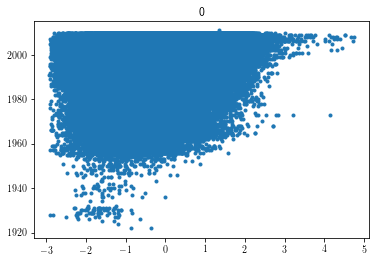

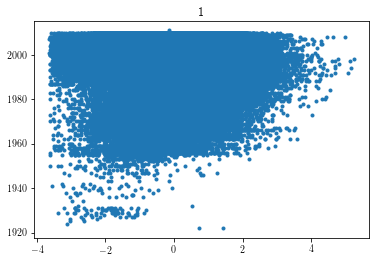

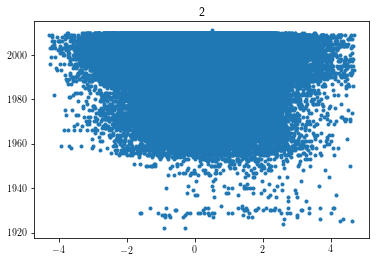

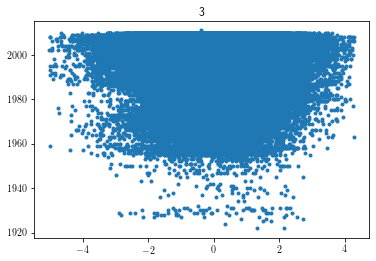

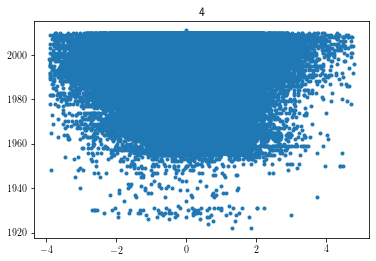

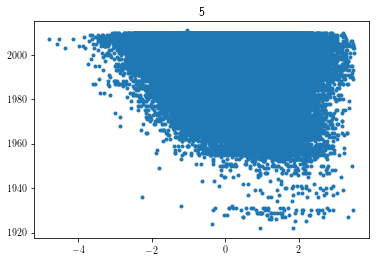

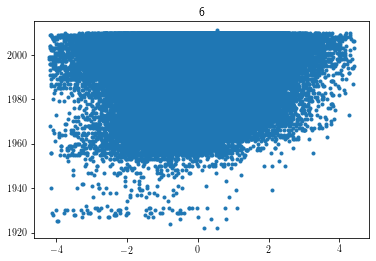

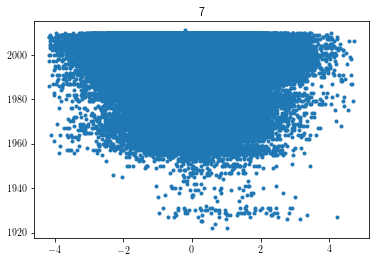

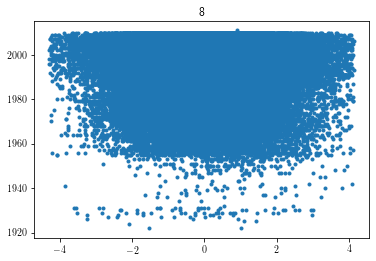

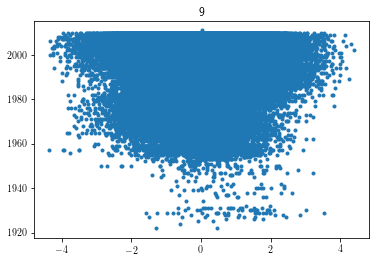

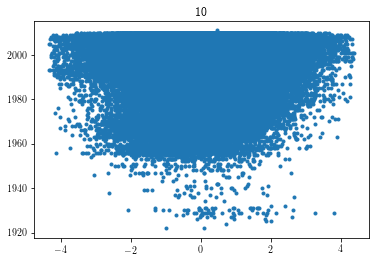

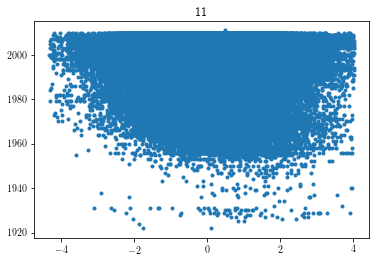

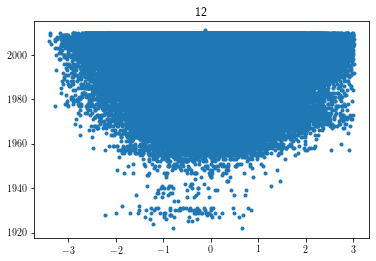

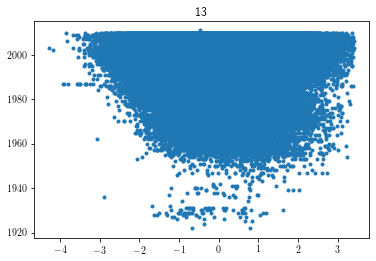

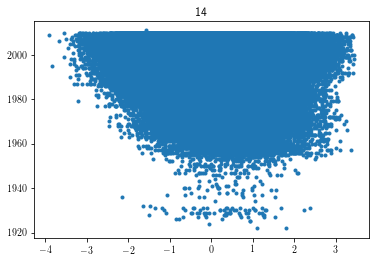

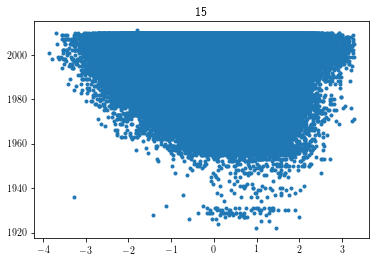

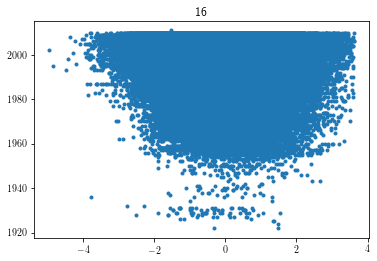

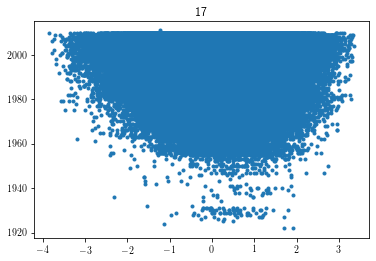

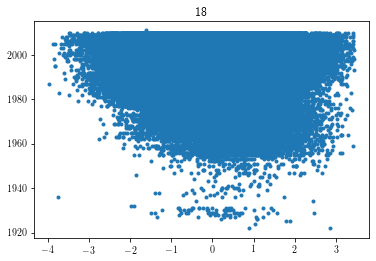

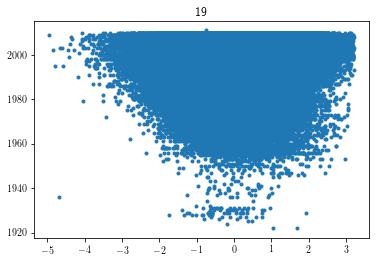

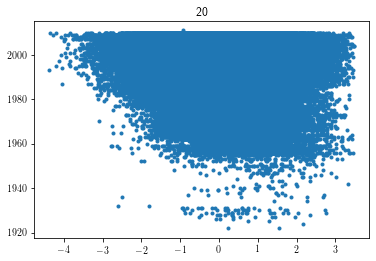

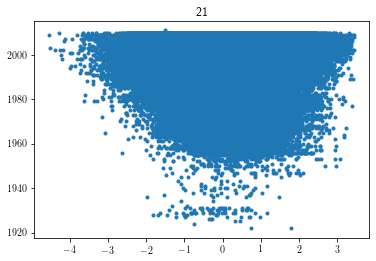

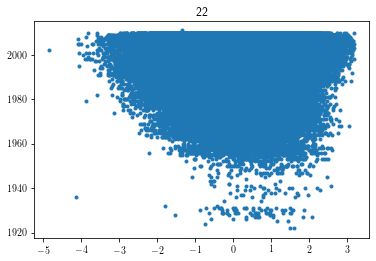

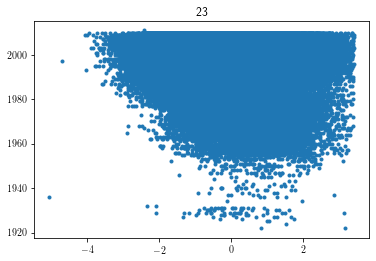

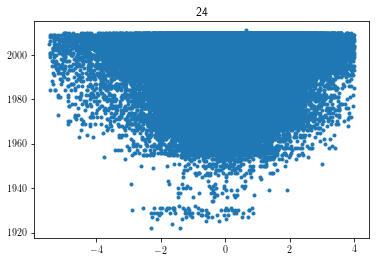

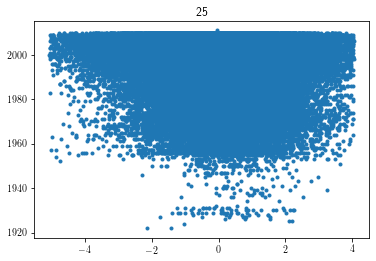

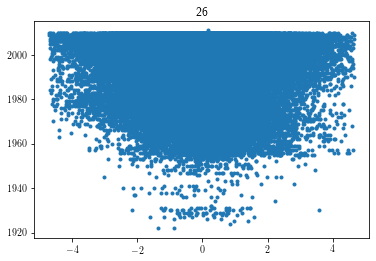

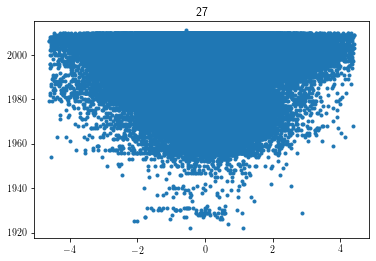

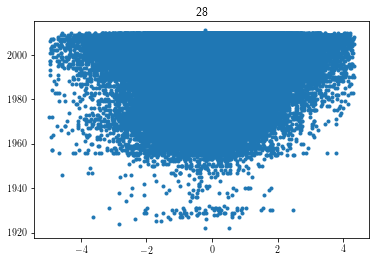

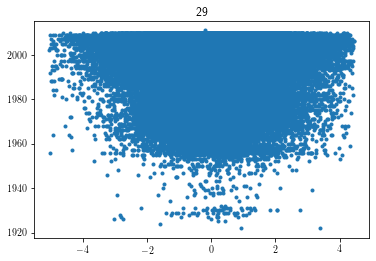

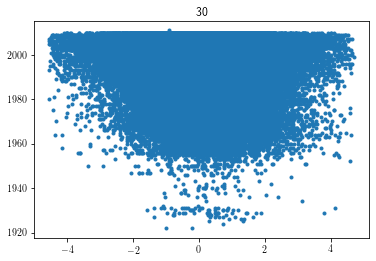

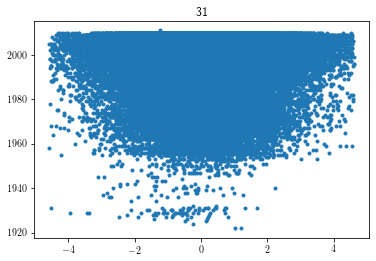

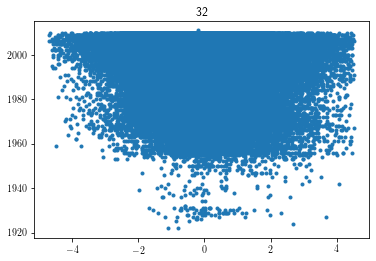

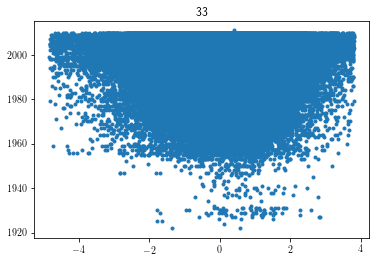

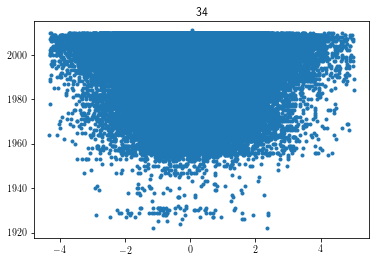

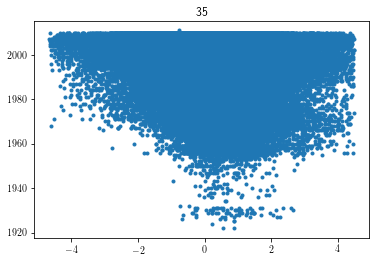

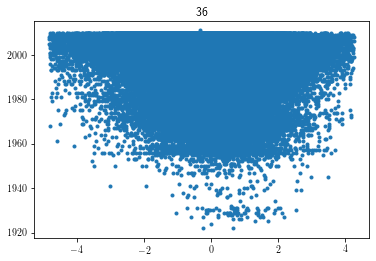

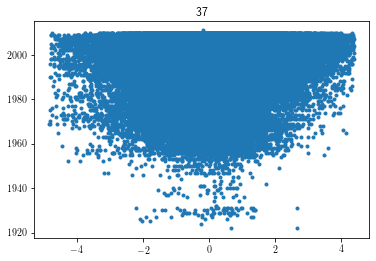

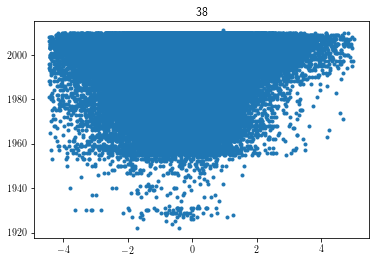

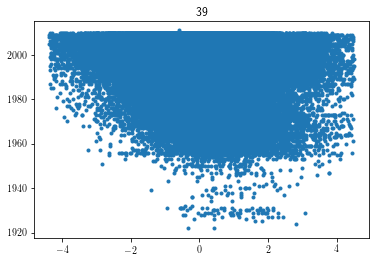

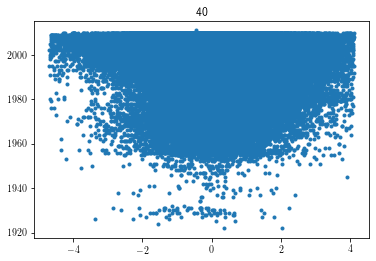

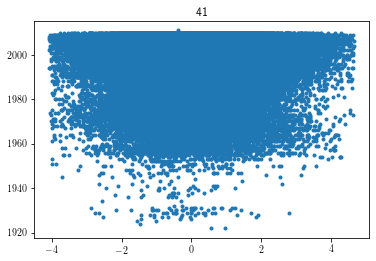

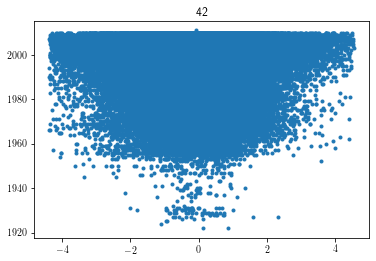

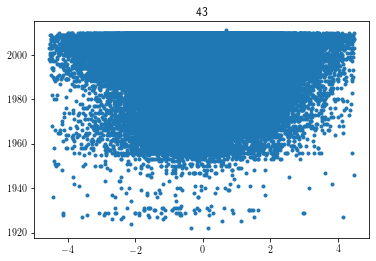

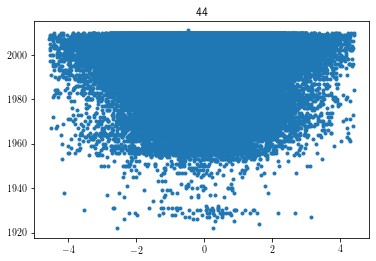

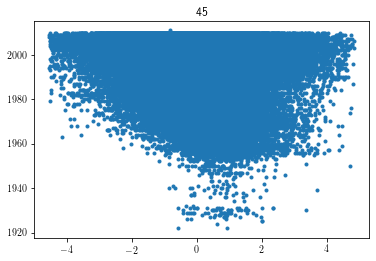

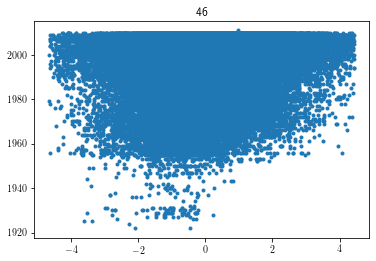

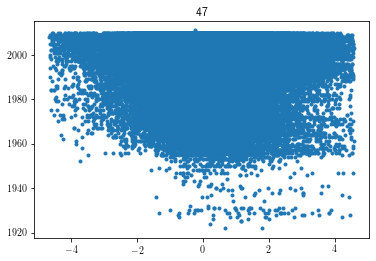

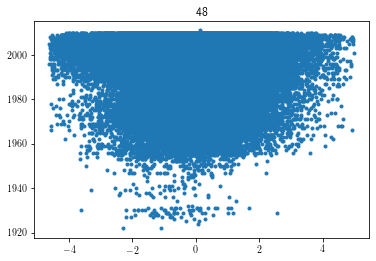

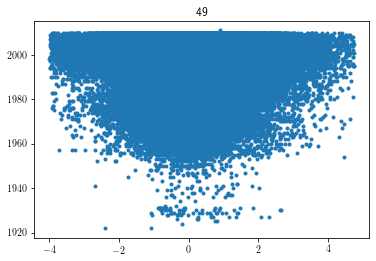

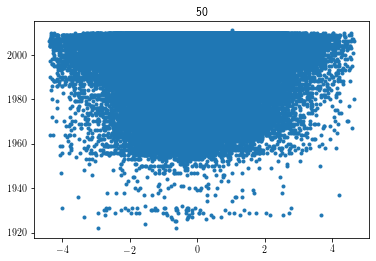

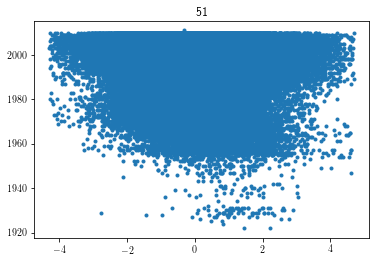

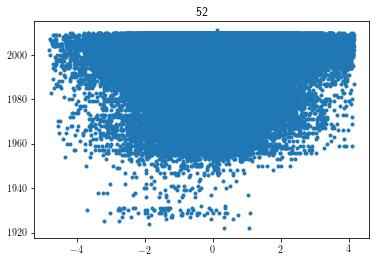

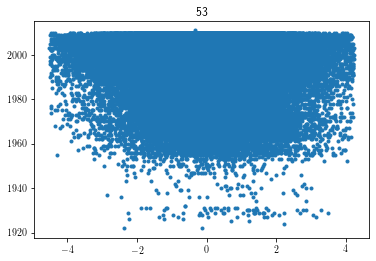

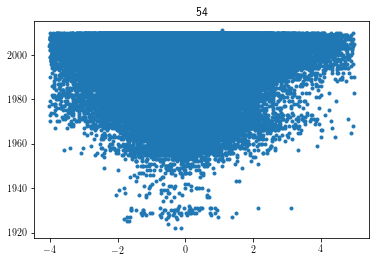

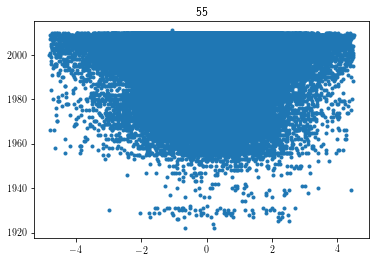

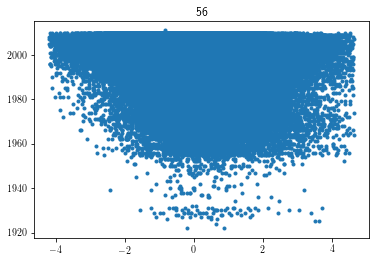

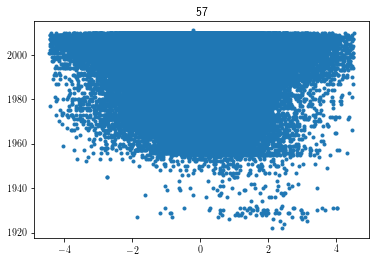

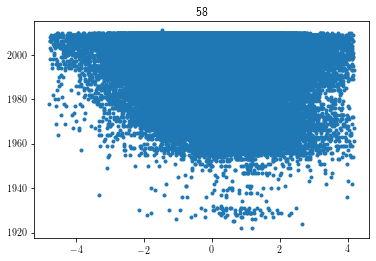

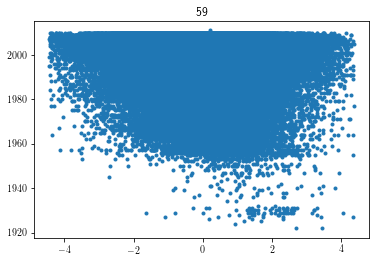

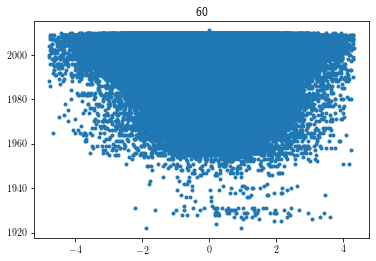

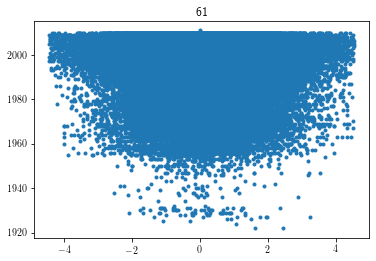

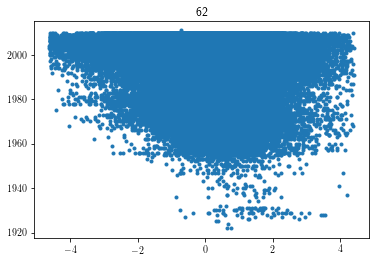

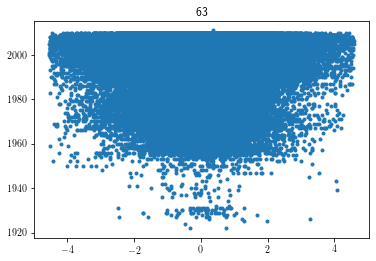

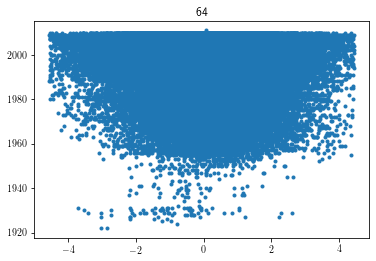

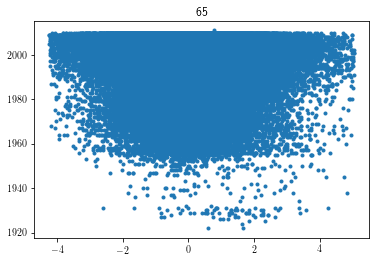

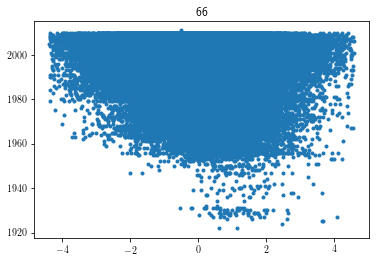

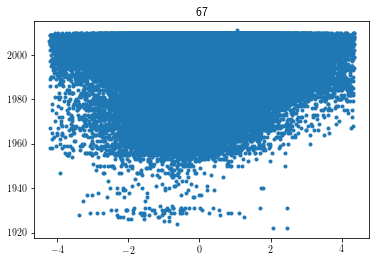

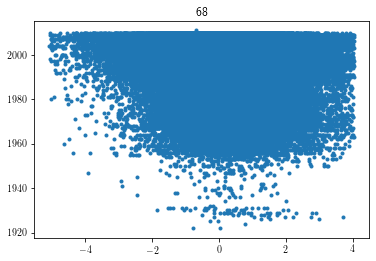

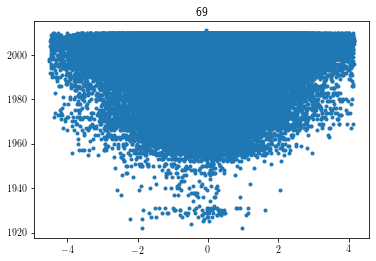

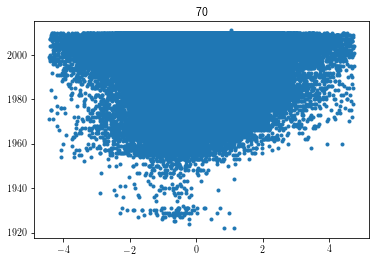

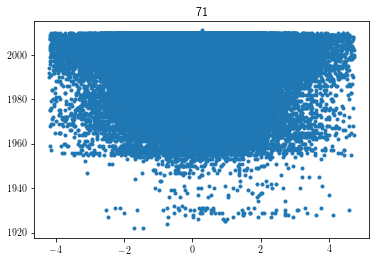

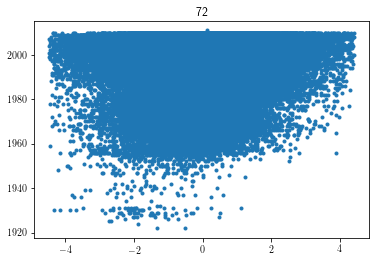

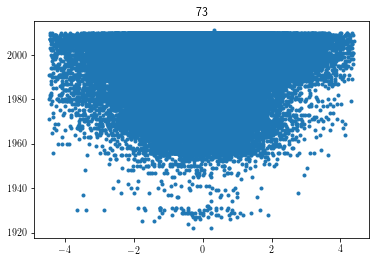

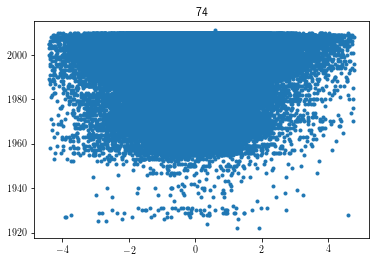

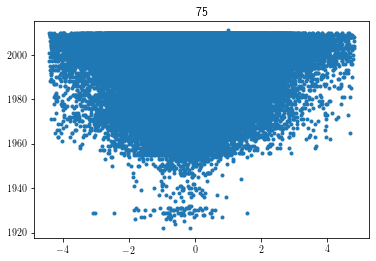

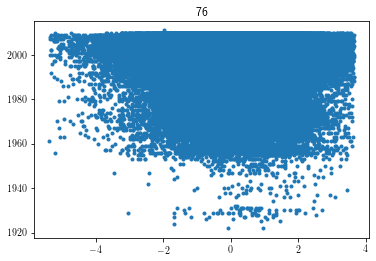

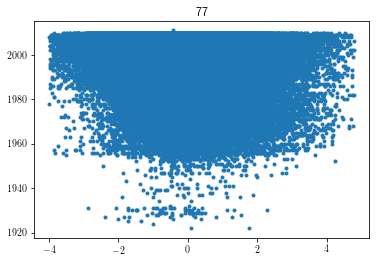

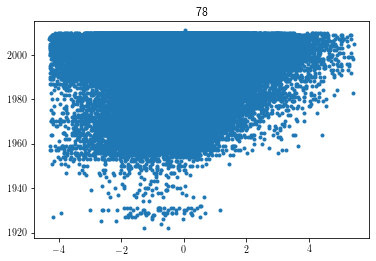

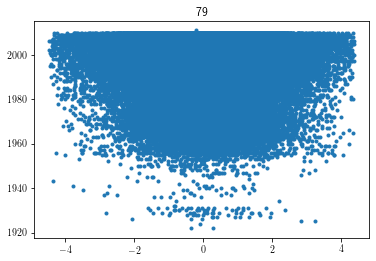

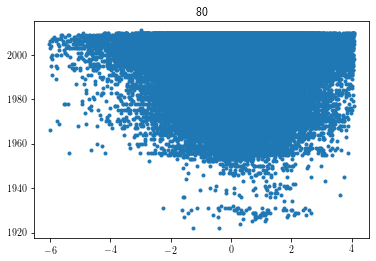

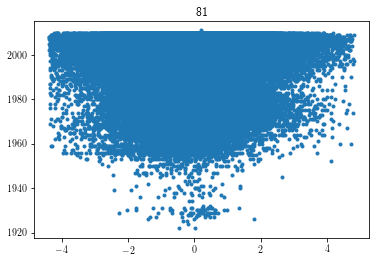

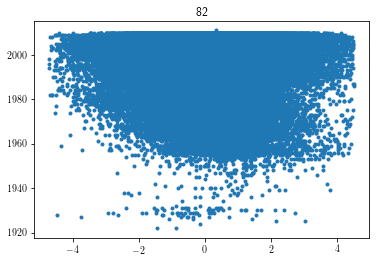

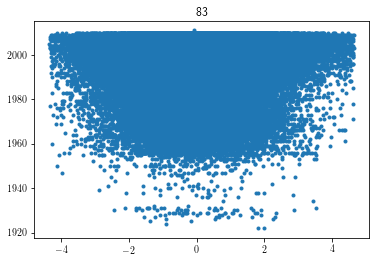

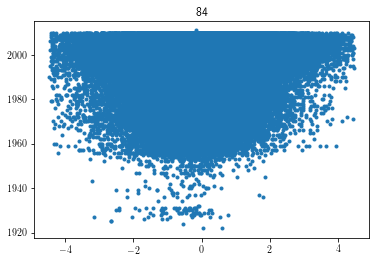

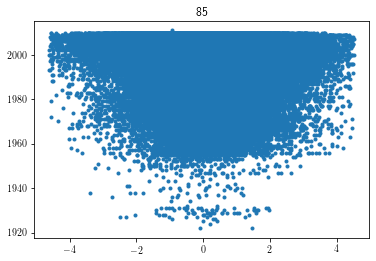

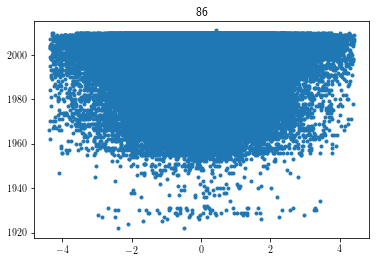

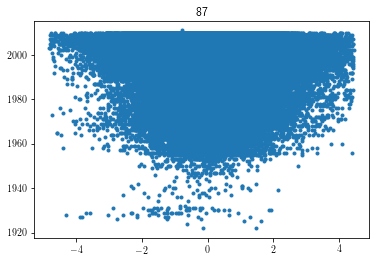

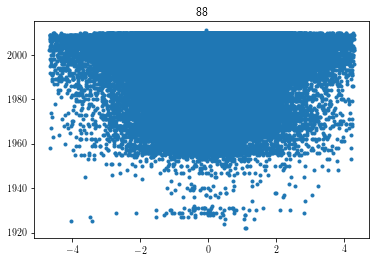

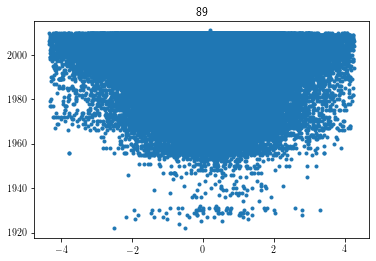

In [7]:
for column in train_X_scaled.columns:
  plt.scatter(train_X_scaled[column], train_y_reduced, marker=".")
  plt.title(column)
  plt.show()

Como vemos, ahora si que tenemos una tendencia un tanto más clara en los datos.

El hecho de que estén un poco más inclinados respecto de la y indica cierta proporcionalidad.

Ahora que tenemos los datos listos, podemos pasar a explorar los modelos.

## Modelos a explorar

Vamos a usar todas las columnas disponibles para todos los modelos, aunque suponga un ligero aumento en el tiempo de ejecución. Para cada modelo ajustaremos los parámetros para obtener el menor ruido posible y obtener un buen ajuste.

Haremos un estudio de los siguientes modelos como posibles candidatos:

* **[Regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)**: un modelo estándar de regresión lineal que busca minimizar la suma de cuadrados.
* **[Regresión con SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor)**: un modelo que implementa el gradiente descendente estocástico para minimizar la función de pérdida (variable por parámetros) y a la que se le añade una penalización estadística (*penalty*).
* **[Elastic-Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)**: regresión lineal con penalización *L1* y *L2* para regular los coeficientes. Suele presentar mejores resultados que la regresión lineal estándar.


Explicaremos más en detalle cada uno de estos modelos en su sección correspondiente.

Cuando hablemos del resultado que nos proporciona un modelo, utilizaremos el método *score* del mismo, cuya medida es $\displaystyle R^2 = (1 - \frac{u}{v})$, tal que $u$ es el *MSE* y $v$ es la suma total de cuadrados ($\displaystyle ∑(y - y.mean())^2$) a no ser que se indique lo contrario.

### Regresión lineal

Este es el modelo más simple de los que vamos a explorar, de hecho, es tan simple que ni siquiera podemos proporcionarle ningún parámetro, por lo que simplemente vamos a ver el *MSE* que nos da.

In [6]:
regLin = linear_model.LinearRegression()
print("Ein: %s" % model_selection.cross_val_score(regLin, train_X_scaled, train_y_reduced).mean())

Ein: 0.30132696877090737


Recordamos que este modelo de regresión usa como medida el *MSE*. En lo que respecta al *score*, el mejor valor que podemos obtener es 1.

Como podemos observar, el ajuste es un tanto pésimo.

Vamos a visualizar la curva de aprendizaje.

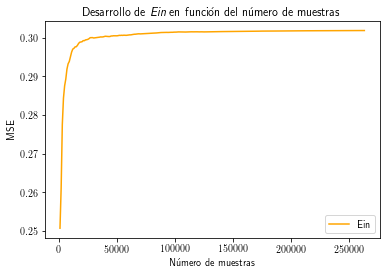

In [7]:
accError_regLin = {}
for i in range(1000,len(train_X_scaled),1000):
  regLin.fit(train_X_scaled.iloc[:i], train_y_reduced[:i])
  accError_regLin[i] = regLin.score(train_X_scaled, train_y_reduced)

plt.plot(list(accError_regLin.keys()), list(accError_regLin.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel(r'$R^2$')
plt.legend()
plt.show()

Como vemos, se produce una primera fase de aprendizaje bastante pronunciada, pero luego se estanca y apenas se produce aprendizaje a partir de las 20000 muestras. Vamos a ver esa parte más de cerca.

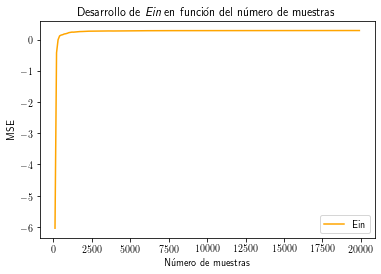

In [10]:
accError_regLin = {}
for i in range(100,20000,100):
  regLin.fit(train_X_scaled.iloc[:i], train_y_reduced[:i])
  accError_regLin[i] = regLin.score(train_X_scaled, train_y_reduced)

plt.plot(list(accError_regLin.keys()), list(accError_regLin.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel(r'$R^2$')
plt.legend()
plt.show()

Aquí se puede apreciar algo que no se veía en la gráfica anterior: tenemos un score negativo durante las primeras ~1000 muestras.

Esto se debe al pésimo ajuste que se está dando hasta que no tenemos una buena muestra de datos para aprender correctamente.

### Regresión con SGD

En este apartado vamos a comprobar la validez de la regresión SGD que, como su nombre indica, usa SGD como optimizador.

Para determinar la función de pérdida a usar vamos a realizar una batería de pruebas entre las siguientes:

* *squared_error*, Error cuadrático medio, la función estándar para los problemas de regresión.
* *huber*, similar al error cuadrático medio, pero cuando superamos cierto margen pasa a ser una pérdida lineal.
* *epsilon_insensitive*, una vez que obtenemos un error menor que *epsilon*, se vuelve lineal.
* *squared_epsilon_insensitive*, similar a la anterior, pero cuadrática.

A su vez, también vamos a determinar el valor de *penalty*, por lo que para cada función de pérdida probaremos con *l2*, *l1* y *elasticnet*, siendo esta última una combinación de las otras dos

Fijaremos el *learning rate* en "*optimal*", que usa una heurística propuesta por Leon Bottou.

Vamos a realizar la batería de pruebas. De las distintas opciones escogeremos la que mejores resultados nos de y la analizaremos mas en profundidad.

In [8]:
max_iters = 1000

losses = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1', 'l2', 'elasticnet']

SGD_results = {}

for loss in losses:
  for penalty in penalties:
    SGD_solver = linear_model.SGDRegressor(max_iter=max_iters, loss=loss, penalty=penalty, learning_rate='optimal')
    SGD_results[loss + " " + penalty] = model_selection.cross_val_score(SGD_solver, train_X_scaled, train_y_reduced).mean()

print(SGD_results)

{'squared_error l1': 0.287809145859658, 'squared_error l2': 0.2924489883571965, 'squared_error elasticnet': 0.2911155014230853, 'huber l1': 0.25573622121811096, 'huber l2': 0.2553971623758411, 'huber elasticnet': 0.2560746118271348, 'epsilon_insensitive l1': 0.2547509869498888, 'epsilon_insensitive l2': 0.2541326321379705, 'epsilon_insensitive elasticnet': 0.25685331401963285, 'squared_epsilon_insensitive l1': 0.28694094924890506, 'squared_epsilon_insensitive l2': 0.28239544494265206, 'squared_epsilon_insensitive elasticnet': 0.281717265522059}


Cómo vemos, en nuestro caso el que mejor resultados nos proporciona es el que usa de función de pérdida *squared_error* y tras varias ejecuciones hemos llegado a la conclusión de que realmente la *penalty* no influye mucho, por tanto, usaremos *L1*.

Vamos a visualizar la curva de aprendizaje de este modelo, no sin antes reducir el máximo de iteraciones a 100 para evitar que se prolongue demasiado la ejecución.

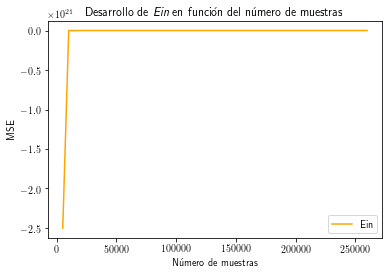

In [12]:
max_iters = 100

sgd = linear_model.SGDRegressor(max_iter=max_iters, loss='squared_error', penalty='l1', learning_rate='optimal')

accError_sgd = {}

for i in range(5000,len(train_X_scaled),5000):
  sgd.fit(train_X_scaled.iloc[:i], train_y_reduced[:i])
  accError_sgd[i] = sgd.score(train_X_scaled, train_y_reduced)

plt.plot(list(accError_sgd.keys()), list(accError_sgd.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel(r'$R^2$')
plt.legend()
plt.show()

Como vemos, el resultado obtenido es bastante similar al de la regresión lineal, no obstante, aquí se aprecian aún ḿás los *scores* negativos, lo cual indica un peor ajuste, por lo que no vamos a explorar las etapas tempranas del entrenamiento.

### Regresión Elastic-Net

Este modelo se trata de una regresión lineal con penalización *elastic-net* (una combinación de *L1* y *L2*).
No tenemos muchos parámetros abiertos a configuración, al igual que pasaba con la regresión lineal estándar, por lo que tan solo realizaremos una pequeña prueba para observar el resultado.

In [9]:
elasticNet_solver = linear_model.ElasticNet()
print("Ein: %s" % model_selection.cross_val_score(elasticNet_solver, train_X_scaled, train_y_reduced).mean())

Ein: 0.17642124537540002


Resulta que el ajuste obtenido es incluso peor que en los casos anteriores, no obstante, vamos a observar ahora la gráfica de aprendizaje en función del número de muestras.

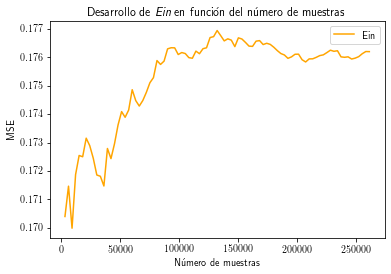

In [8]:
accError_elasticNet = {}

for i in range(3000,len(train_X_scaled),3000):
  elasticNet_solver.fit(train_X_scaled.iloc[:i], train_y_reduced[:i])
  accError_elasticNet[i] = elasticNet_solver.score(train_X_scaled, train_y_reduced)

plt.plot(list(accError_elasticNet.keys()), list(accError_elasticNet.values()), 'orange', label='Ein')
plt.title(r'Desarrollo de \textit{Ein} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel(r'$R^2$')
plt.legend()
plt.show()

Como se puede ver, el aprendizaje resulta un tanto escalonado, aunque se aprecia una clara tendencia ascendente, esta se estabiliza en torno a las 150000 muestras, no obteniendo mejores resultados.

## Modelo elegido

En base a los resultados obtenidos en todas las pruebas, queda claro que tan solo tenemos dos posibles candidatos:
* Regresión lineal.
* Regresión con SGD.

Ambos nos han dado un resultado de CV similar, siendo ligeramente superior el de regresión lineal, así que, ¿Cómo nos decidimos?.
Basándonos puramente en el tiempo de ejecución, vamos a optar por usar la regresión lineal estándar, ya que tarda bastante menos en ejecutarse y no ha presentado malos resultados.

Ahora bien, vamos a estimar el error fuera de la muestra. Para esto, primero tenemos que convertir los datos de test, aplicándoles las mismas transformaciones que realizamos con train.

In [20]:
test_X['y'] = test_y  # Juntamos a la X la y para eliminar los outliers también de la y
test_X_reduced = test_X[~((X < lower_limit) |(X > upper_limit)).any(axis=1)]

test_y_reduced = test_X_reduced['y']  # Volvemos a separar
test_X_reduced = test_X_reduced.drop('y', axis=1)

test_X_scaled = pd.DataFrame(scaler.transform(test_X_reduced))
test_X_scaled.describe()

0              1              2              3   \
count  113057.000000  113057.000000  113057.000000  113057.000000   
mean       -0.001010      -0.002796      -0.003984      -0.002929   
std         1.004442       1.000599       0.999969       1.002759   
min        -2.917367      -3.647619      -4.226486      -5.050508   
25%        -0.727547      -0.667079      -0.647029      -0.622695   
50%         0.007870      -0.005688       0.004412      -0.003744   
75%         0.746593       0.680908       0.623744       0.613380   
max         4.736908       5.251819       4.667208       4.274968   

                  4              5              6              7   \
count  113057.000000  113057.000000  113057.000000  113057.000000   
mean        0.004113      -0.000559       0.002147      -0.002170   
std         0.997755       1.005127       1.002023       0.999968   
min        -3.895551      -4.800155      -4.172528      -4.154841   
25%        -0.638522      -0.731895      -0.618370      -0.634854   
50%         0.008331      -0.045740      -0.002292       0.003228   
75%         0.654367       0.716081       0.629799       0.636381   
max         4.736950       3.514799       4.427543       4.686443   

                  8              9   ...             80             81  \
count  113057.000000  113057.000000  ...  113057.000000  113057.000000   
mean        0.001573      -0.002412  ...      -0.003537      -0.004504   
std         0.996337       0.999851  ...       1.002122       1.002514   
min        -4.284578      -4.282983  ...      -6.025706      -4.371386   
25%        -0.628142      -0.680722  ...      -0.539472      -0.514576   
50%        -0.008922      -0.007213  ...      -0.063761       0.053873   
75%         0.614808       0.677831  ...       0.512932       0.540900   
max         4.111143       4.386577  ...       4.059967       4.818445   

                  82             83             84             85  \
count  113057.000000  113057.000000  113057.000000  113057.000000   
mean        0.001577       0.005368      -0.001281       0.002868   
std         1.006872       0.998143       0.999056       1.008160   
min        -4.669357      -4.325335      -4.426005      -4.597943   
25%        -0.567429      -0.571324      -0.552001      -0.569035   
50%        -0.029573      -0.052038      -0.025279      -0.025810   
75%         0.546506       0.539944       0.553319       0.567471   
max         4.508399       4.628654       4.458966       4.511617   

                  86             87             88             89  
count  113057.000000  113057.000000  113057.000000  113057.000000  
mean        0.004510       0.001831       0.005782       0.003775  
std         1.005415       1.008653       1.000580       1.000945  
min        -4.357264      -4.790407      -4.683866      -4.331366  
25%        -0.553037      -0.568852      -0.543166      -0.518083  
50%         0.030464      -0.021322      -0.002750       0.016437  
75%         0.562158       0.554389       0.539183       0.525462  
max         4.406966       4.455031       4.294057       4.237144  

[8 rows x 90 columns]

Una vez que tenemos los datos listos, vamos a ejecutar la regresión lineal con los datos de test, estimando así el error fuera de la muestra.

In [24]:
regLin.fit(train_X_scaled, train_y_reduced)

print("Acierto estimado fuera de la muestra: %s" % regLin.score(test_X_scaled, test_y_reduced))

Acierto estimado fuera de la muestra: 0.30059810655328756


Como vemos, obtenemos un $R^2$ bastante similar al obtenido en *train*, con lo cual podemos decir que nuestro modelo ha aprendido.

Vamos a dibujar la gráfica de cómo se desarrolla el aprendizaje con *Ein* y *Eout* para este modelo.

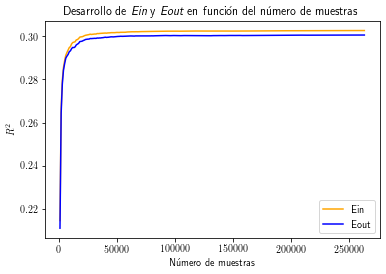

In [27]:
accError_regLin = {}
for i in range(1000,len(train_X_scaled),1000):
  regLin.fit(train_X_scaled.iloc[:i], train_y_reduced[:i])
  accError_regLin[i] = [regLin.score(train_X_scaled, train_y_reduced), regLin.score(test_X_scaled, test_y_reduced)]

values = np.array(list(accError_regLin.values()))
plt.plot(list(accError_regLin.keys()), values[:,0], 'orange', label='Ein')
plt.plot(list(accError_regLin.keys()), values[:,1], 'blue', label='Eout')
plt.title(r'Desarrollo de \textit{Ein} y \textit{Eout} en función del número de muestras')
plt.xlabel("Número de muestras")
plt.ylabel(r'$R^2$')
plt.legend()
plt.show()

Como vemos en la gráfica, *Ein* y *Eout* no suelen separarse mucho, lo cual indica un buen aprendizaje ya que cuando aumenta *Ein*, también lo hace *Eout* y viceversa, así pues, podríamos decir que nuestro *Ein* era un buen estimador para *Eout*.

## Conclusión

Si esto fuera una situación real, podríamos mostrar a la empresa las distintas opciones disponibles, así como el porcentaje de acierto aproximado que tendrían las mismas en la práctica. Así pues, mi recomendación personal para la empresa sería optar por usar una regresión lineal estándar, ya que ha sido la que mejores resultados tanto en tiempo como en precisión ha obtenido durante las pruebas, esto les garantizaría un *MSE* de 0.7 aproximadamente.

Una vez la empresa tuviera los datos, podrían elegir si asumir o no ese *MSE.